In [2]:
import tensorflow as tf;
import matplotlib.pyplot as plt;
import cv2;
import numpy as np;

# These steps are just for including the dataset (MNIST Dataset)

In [4]:
# Now we are loading the MNIST data.......
from tensorflow.examples.tutorials.mnist import input_data;
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


<class 'numpy.ndarray'>


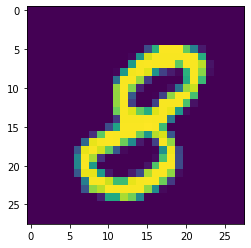

In [9]:
first_image=mnist.train.images[5]
#print(type(mnist.train.images[0]))
first_image=first_image.reshape(28,28)
plt.imshow(first_image);
plt.show();

# Now we will be making just initializing random vlaue to the weights...

In [10]:
n_hidden_1=256;
n_hidden_2=256;
n_input=784 # because there are 784 properties or pixels..........
n_class=10;

In [11]:
# its completely based on us that whether we want to make a dictionary containing all the weights for each layer or
# we want just different lists for each layer......and dictionary will be a lot helpful to keep a track........
weights={"h1":tf.Variable(tf.random_normal([n_input,n_hidden_1])),
         "h2":tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
         "output":tf.Variable(tf.random_normal([n_hidden_2,n_class]))
        };

biases={"h1":tf.Variable(tf.random_normal([n_hidden_1])),
        "h2":tf.Variable(tf.random_normal([n_hidden_2])),
        "output":tf.Variable(tf.random_normal([n_class]))
       }

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# now we will be doing the forward propogation.....
def forward_propogation(x,weights,biases):
    in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1']);
    out_layer1=tf.nn.relu(in_layer1);
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2']);
    out_layer2=tf.nn.relu(in_layer2);
    
    output=tf.add(tf.matmul(out_layer2,weights['output']),biases['output']);
    return output;
    

In [15]:
x=tf.placeholder("float32",[None,n_input]);
y=tf.placeholder(tf.int32,[None,n_class])# noe we need our y as int the form of one hot encoding.......and that's
# why we are passing n_classes in this funcution.....

In [16]:
pred = forward_propogation(x, weights, biases)
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

In [17]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01);
optimize=optimizer.minimize(cost);
sess=tf.Session();
sess.run(tf.global_variables_initializer());

In [18]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost,optimize], feed_dict={x:batch_x , y:batch_y}) # Here we r finding the cost just becasue 
        # in the future we need to find the total cost for one iteration otherwise we would jave just run the optimizer
        # just like sess.run(optimizer,feed_dict={x: , y:})..........
        total_cost += c
    print(total_cost)

TypeError: cannot unpack non-iterable NoneType object

In [11]:
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions,correct_predictions  = sess.run([predictions, correct_predictions], feed_dict={x:mnist.test.images,
                                              y:mnist.test.labels})
correct_predictions.sum()

9594

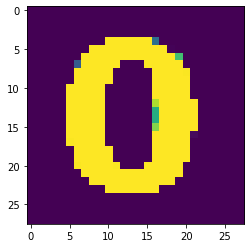

NUMBER SHOWN IN THE IMAGE IS -> 0


In [12]:
img = cv2.imread('/Users/jatinkaushik/Desktop/0.jpeg',0) 
img=cv2.resize(img,(28,28));
img = cv2.bitwise_not(img)
plt.imshow(img);
plt.show()
ans=tf.argmax(pred,1);
img=img.reshape(1,784);
symbol=sess.run([ans],feed_dict={x:img})
print("NUMBER SHOWN IN THE IMAGE IS ->",symbol[0][0])

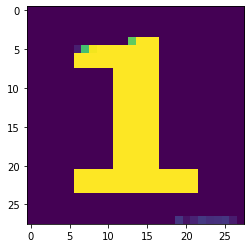

NUMBER SHOWN IN THE IMAGE IS -> 8


In [13]:
img = cv2.imread('/Users/jatinkaushik/Desktop/1.jpeg',0) 
img=cv2.resize(img,(28,28));
img = cv2.bitwise_not(img)
plt.imshow(img);
plt.show()
ans=tf.argmax(pred,1);
img=img.reshape(1,784);
symbol=sess.run([ans],feed_dict={x:img})
print("NUMBER SHOWN IN THE IMAGE IS ->",symbol[0][0])

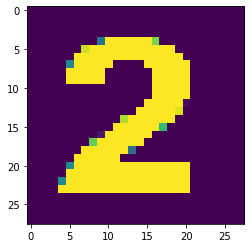

NUMBER SHOWN IN THE IMAGE IS -> 2


In [14]:
img = cv2.imread('/Users/jatinkaushik/Desktop/2.jpeg',0) 
img=cv2.resize(img,(28,28));
img = cv2.bitwise_not(img)
plt.imshow(img);
plt.show()
ans=tf.argmax(pred,1);
img=img.reshape(1,784);
symbol=sess.run([ans],feed_dict={x:img})
print("NUMBER SHOWN IN THE IMAGE IS ->",symbol[0][0])

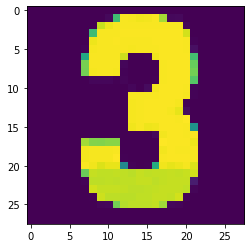

NUMBER SHOWN IN THE IMAGE IS -> 3


In [15]:
img = cv2.imread('/Users/jatinkaushik/Desktop/3.jpeg',0) 
img=cv2.resize(img,(28,28));
img = cv2.bitwise_not(img)
plt.imshow(img);
plt.show()
ans=tf.argmax(pred,1);
img=img.reshape(1,784);
symbol=sess.run([ans],feed_dict={x:img})
print("NUMBER SHOWN IN THE IMAGE IS ->",symbol[0][0])

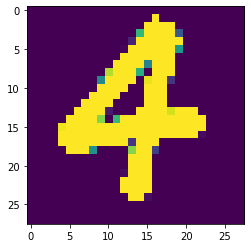

NUMBER SHOWN IN THE IMAGE IS -> 4


In [16]:
img = cv2.imread('/Users/jatinkaushik/Desktop/4.jpeg',0) 
img=cv2.resize(img,(28,28));
img = cv2.bitwise_not(img)
plt.imshow(img);
plt.show()
ans=tf.argmax(pred,1);
img=img.reshape(1,784);
symbol=sess.run([ans],feed_dict={x:img})
print("NUMBER SHOWN IN THE IMAGE IS ->",symbol[0][0])

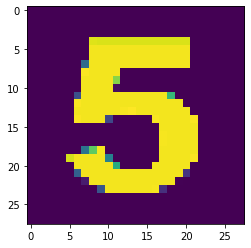

NUMBER SHOWN IN THE IMAGE IS -> 5


In [17]:
img = cv2.imread('/Users/jatinkaushik/Desktop/5.jpeg',0) 
img=cv2.resize(img,(28,28));
img = cv2.bitwise_not(img)
plt.imshow(img);
plt.show()
ans=tf.argmax(pred,1);
img=img.reshape(1,784);
symbol=sess.run([ans],feed_dict={x:img})
print("NUMBER SHOWN IN THE IMAGE IS ->",symbol[0][0])

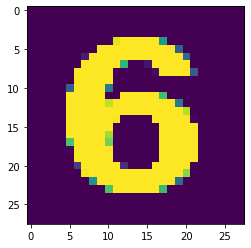

NUMBER SHOWN IN THE IMAGE IS -> 8


In [18]:
img = cv2.imread('/Users/jatinkaushik/Desktop/6.jpeg',0) 
img=cv2.resize(img,(28,28));
img = cv2.bitwise_not(img)
plt.imshow(img);
plt.show()
ans=tf.argmax(pred,1);
img=img.reshape(1,784);
symbol=sess.run([ans],feed_dict={x:img})
print("NUMBER SHOWN IN THE IMAGE IS ->",symbol[0][0])

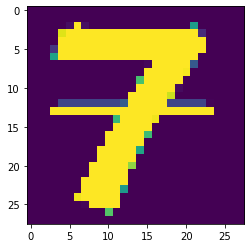

NUMBER SHOWN IN THE IMAGE IS -> 8


In [19]:
img = cv2.imread('/Users/jatinkaushik/Desktop/7.jpeg',0) 
img=cv2.resize(img,(28,28));
img = cv2.bitwise_not(img)
plt.imshow(img);
plt.show()
ans=tf.argmax(pred,1);
img=img.reshape(1,784);
symbol=sess.run([ans],feed_dict={x:img})
print("NUMBER SHOWN IN THE IMAGE IS ->",symbol[0][0])

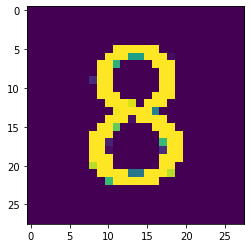

NUMBER SHOWN IN THE IMAGE IS -> 8


In [20]:
img = cv2.imread('/Users/jatinkaushik/Desktop/8.jpeg',0) 
img=cv2.resize(img,(28,28));
img = cv2.bitwise_not(img)
plt.imshow(img);
plt.show()
ans=tf.argmax(pred,1);
img=img.reshape(1,784);
symbol=sess.run([ans],feed_dict={x:img})
print("NUMBER SHOWN IN THE IMAGE IS ->",symbol[0][0])

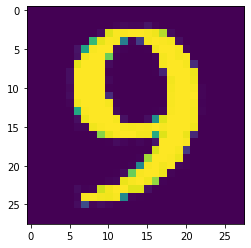

NUMBER SHOWN IN THE IMAGE IS -> 0


In [21]:
img = cv2.imread('/Users/jatinkaushik/Desktop/9.jpeg',0) 
img=cv2.resize(img,(28,28));
img = cv2.bitwise_not(img)
plt.imshow(img);
#img = cv2.bitwise_not(img)
plt.show()
ans=tf.argmax(pred,1);
img=img.reshape(1,784);
symbol=sess.run([ans],feed_dict={x:img})
print("NUMBER SHOWN IN THE IMAGE IS ->",symbol[0][0])

In [30]:

from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

width = 500
height = 500
white = (225,225,225)
black = (0,0,0)
# creating objec of class DigitReco 
 

def save():
    filename = "image56.jpg"
    image1.save(filename)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    cv.create_oval(x1, y1, x2, y2, fill = 'white',width=5)
    draw.line([x1, y1, x2, y2],fill = 'white',width=5)
    
 
root = Tk()
cv = Canvas(root, width=width, height=height, bg='white')
cv.pack()

#memory save

image1 = PIL.Image.new("RGB", (width, height),black)
draw = ImageDraw.Draw(image1)

#draw
cv.pack(expand=YES, fill= BOTH)
cv.bind("<B1-Motion>", paint)

button=Button(text="save",command=save)
#button1=Button(text="Predict",command=predictDigit)
button.pack()
root.mainloop()


import cv2
import tkinter
from tkinter import filedialog

def openImage():
    global filePathName
    global imagePtr
    print("Opening Image...")
    #root = tkinter.Tk()
    filePathName = filedialog.askopenfilename(initialdir = "C:\\",title = "Select Image file",filetypes =(("jpeg files","*.jpg"),("gif files","*.gif"),("png files","*.png"),("All","*.*")))

    print(filePathName)
    imagePtr = cv.imread(filePathName,1) # 1 means with color info
    # print(imagePtr)
    height, width = imagePtr.shape[:2]
    print("Width:",width," Height:",height)
    cv.namedWindow(filePathName,cv2.WINDOW_AUTOSIZE)
    #windowName = cv2.resizeWindow(filePathName,1920, 1080)
    if(height < 1600):
        imagePtr = cv.resize(imagePtr,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_AREA)
    elif(height < 2000 ):
        imagePtr = cv.resize(imagePtr, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_AREA)
    else:
        imagePtr = cv.resize(imagePtr, None, fx=0.25, fy=0.25, interpolation=cv2.INTER_AREA)
    print(imagePtr)
    cv.imshow(filePathName,imagePtr)
    cv.waitKey(1)

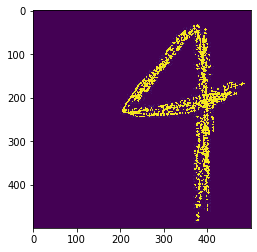

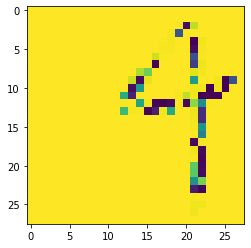

NUMBER SHOWN IN THE IMAGE IS -> 3


In [31]:
img = cv2.imread('/Users/jatinkaushik/image56.jpg',0) 
plt.imshow(img)
plt.show()
img=cv2.resize(img,(28,28));
#img[img>0]=1
img = cv2.bitwise_not(img)
plt.imshow(img);
plt.show()
ans=tf.argmax(pred,1);
img=img.reshape(1,784);
symbol=sess.run([ans],feed_dict={x:img})
print("NUMBER SHOWN IN THE IMAGE IS ->",symbol[0][0])